In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

""" A meta desse código é limpar os dados para ficarem bem compreendidos,
produzir gráficos para entender qual o valor máximo de cada salário por
anos de experiências pelo Power BI, e responder se a experiência é o principal
fator a se definir o cálculo do salário bruto nesse dataframe.  """

"""1 - Processo de limpeza de dados, o objetivo é apenas deixar as pessoas que trabalham
como Cientista de dados de forma integral em seu emprego. Além disso, farei a traducao da
maioria dos dados disponíveis.

- Explicando a coluna 'anos de experiência':
18 = Executivo
9 = Sênior/pleno
5 = Médio
3 = Junior
Dados retirados de uma pesquisa de quanto leva para subir de cargo no meio profissional(estimativa),
óbvio que não é um número exato, pois pode variar de empresa para empresa. """

data = pd.read_csv("C:/Users/marce/ansel/Desktop/Nivel de experien/ds_salaries.csv")

data.drop(["employee_residence",  "remote_ratio" , "company_size","salary", ] ,axis= 1, inplace=True)


new_data= data.rename(columns= {"work_year" : "Ano do salário", "experience_level" : "Anos de experiência",
                                 "employment_type" : "Tipo de trabalho", "job_title" : "Função" , 
                                  "salary_currency" : "Moeda" , 
                                 "salary_in_usd" : "Salário em dólar", "company_location" : "Localidade"} )

dataPTBR = new_data.replace(["Data Scientist" , "MI" , "SE", "EN", "USD" , "EUR" , "GBP", "INR", "CAD", "HKD", "CHF", "THB", "PLN", "BRL", 
                             "CLP", "AUD","HUF", "SGD", "TRY", "EX", "FT","US", "CA", "DE", "ES", "FR", ]  ,

                            ["Cientista de dados" , "5" , "9", "3", "Dólar", "Euro", "Libra", "Rupia", "Dólar canadense",
                              "Dólar de Hong Kong", " Franco Suíço", "Baht tailandês", "Zloty polonês", "Real Brasileiros", " Peso chileno",
                                "Dólar australiano", "Florim húngaro", "Dólar singapuriano", "Lira turca", "18", "Tempo integral", "EUA"
                                , "CAN","ALE", "ESP", "FRA", ])

datasc=dataPTBR.loc[dataPTBR["Função"]== "Cientista de dados"]

datasc2 = datasc.drop([2969, 3479 , 3481 , 3710], axis=0) #apagando colunas que não sejam integral/Cientista de dados

datasc2.head(50)


,Ano do salário,Anos de experiência,Tipo de trabalho,Função,Moeda,Salário em dólar,Localidade
3,2023,9,Tempo integral,Cientista de dados,Dólar,175000,CAN
4,2023,9,Tempo integral,Cientista de dados,Dólar,120000,CAN
7,2023,9,Tempo integral,Cientista de dados,Dólar,219000,CAN
8,2023,9,Tempo integral,Cientista de dados,Dólar,141000,CAN
9,2023,9,Tempo integral,Cientista de dados,Dólar,147100,EUA
10,2023,9,Tempo integral,Cientista de dados,Dólar,90700,EUA
17,2023,9,Tempo integral,Cientista de dados,Dólar,170000,EUA
18,2023,9,Tempo integral,Cientista de dados,Dólar,150000,EUA
46,2023,9,Tempo integral,Cientista de dados,Dólar,212750,EUA
47,2023,9,Tempo integral,Cientista de dados,Dólar,185000,EUA


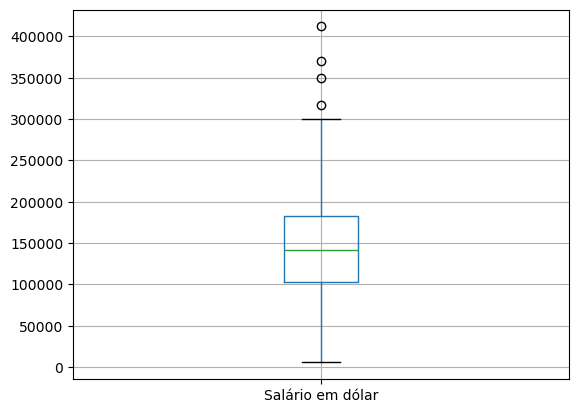

In [2]:
""" Após verificar o boxplot de salário, percebi que há poucos outliers(+300 mil) que podem nos confundir na hora de um futuro
comparativo, decidi remover todos. """


datasc2.boxplot(column= "Salário em dólar")
plt.show()

datasc4 = datasc2.drop([488 , 1097, 1099,1105 , 1605 , 2374, 3750], axis=0) # IDs da linha



In [3]:
"""2 - Power BI"""

"""Separando os níveis de experiência para a criacao dos gráficos do Power BI:
# Link: https://app.powerbi.com/reportEmbed?reportId=29b0e009-f58e-4e11-a7d9-da89d8a1a1af&autoAuth=true&ctid=7c2e74a5-a214-4066-ae86-eac16c2f75dd"""
# Remova as """ no final do link e não copie o: #Link: 


exp3 = datasc4.loc[datasc4["Anos de experiência"]==3]
exp5 = datasc4.loc[datasc4["Anos de experiência"]==5]
exp9 = datasc4.loc[datasc4["Anos de experiência"]==9]
exp18 = datasc4.loc[datasc4["Anos de experiência"]==18]



In [4]:
"""3 - Etapa de visualizacao estatística"""
import statsmodels.api as sm


datasc4['Anos de experiência'] = pd.to_numeric(datasc4['Anos de experiência']) #Transformando a linha de objeto para número

""" Análisando com o statsmodels, podemos crer que os anos de experiência não é a única coisa
que concretiza um salário (R-squared), pode haver outras influências como a localidade e tamanho de empresa. Ademais, pelo P>|t|
vemos que ela é um valor determinante, havendo conexão entre ambas partes."""

k = datasc4["Salário em dólar"] 
j= datasc4["Anos de experiência"] 
j= sm.add_constant(j)

modelo = sm.OLS(k,j)
resultado = modelo.fit()
print(resultado.summary())



                            OLS Regression Results                            
Dep. Variable:       Salário em dólar   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     249.6
Date:                Thu, 16 May 2024   Prob (F-statistic):           2.45e-49
Time:                        19:07:53   Log-Likelihood:                -10160.
No. Observations:                 829   AIC:                         2.032e+04
Df Residuals:                     827   BIC:                         2.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.464e+04   6

In [5]:
#Dados de forma suja:

data.head(10)



,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,company_location
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES
1,2023,MI,CT,ML Engineer,USD,30000,US
2,2023,MI,CT,ML Engineer,USD,25500,US
3,2023,SE,FT,Data Scientist,USD,175000,CA
4,2023,SE,FT,Data Scientist,USD,120000,CA
5,2023,SE,FT,Applied Scientist,USD,222200,US
6,2023,SE,FT,Applied Scientist,USD,136000,US
7,2023,SE,FT,Data Scientist,USD,219000,CA
8,2023,SE,FT,Data Scientist,USD,141000,CA
9,2023,SE,FT,Data Scientist,USD,147100,US


In [6]:
#Dados limpos:

datasc4.head(10)

,Ano do salário,Anos de experiência,Tipo de trabalho,Função,Moeda,Salário em dólar,Localidade
3,2023,9,Tempo integral,Cientista de dados,Dólar,175000,CAN
4,2023,9,Tempo integral,Cientista de dados,Dólar,120000,CAN
7,2023,9,Tempo integral,Cientista de dados,Dólar,219000,CAN
8,2023,9,Tempo integral,Cientista de dados,Dólar,141000,CAN
9,2023,9,Tempo integral,Cientista de dados,Dólar,147100,EUA
10,2023,9,Tempo integral,Cientista de dados,Dólar,90700,EUA
17,2023,9,Tempo integral,Cientista de dados,Dólar,170000,EUA
18,2023,9,Tempo integral,Cientista de dados,Dólar,150000,EUA
46,2023,9,Tempo integral,Cientista de dados,Dólar,212750,EUA
47,2023,9,Tempo integral,Cientista de dados,Dólar,185000,EUA
